### Data Loading

In [50]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as skl
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, ElasticNetCV, ElasticNet
from sklearn.model_selection import GridSearchCV
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))
from scipy import stats
from scipy.stats import norm, skew
pd.options.mode.chained_assignment = None

sns.set(style='darkgrid', palette='deep')

In [9]:
# Load train and test data
train = pd.read_csv("./train.csv.gz", parse_dates=["first_active_month"])
test = pd.read_csv("./test.csv.gz", parse_dates=["first_active_month"])

In [10]:
# Load additional data
merch = pd.read_csv("./merchants.csv.gz")
new_merch = pd.read_csv("./new_merchant_transactions.csv.gz")
historic = pd.read_csv("./historical_transactions.csv.gz")

### Data Exploration

In [11]:
# Data exploration
print("Train set size: ", train.shape)
print("Test set size: ", test.shape)
print("Merchants set size: ", merch.shape)
print("New Merchant Transactios set size: ", new_merch.shape)
print("Historical Transaction set size:", historic.shape)

Train set size:  (201917, 6)
Test set size:  (123623, 5)
Merchants set size:  (334696, 22)
New Merchant Transactios set size:  (1963031, 14)
Historical Transaction set size: (29112361, 14)


In [12]:
train.head(5)

,first_active_month,card_id,feature_1,feature_2,feature_3,target
0,2017-06-01,C_ID_92a2005557,5,2,1,-0.820
1,2017-01-01,C_ID_3d0044924f,4,1,0,0.393
2,2016-08-01,C_ID_d639edf6cd,2,2,0,0.688
3,2017-09-01,C_ID_186d6a6901,4,3,0,0.142
4,2017-11-01,C_ID_cdbd2c0db2,1,3,0,-0.160


In [13]:
test.head(5)

,first_active_month,card_id,feature_1,feature_2,feature_3
0,2017-04-01,C_ID_0ab67a22ab,3,3,1
1,2017-01-01,C_ID_130fd0cbdd,2,3,0
2,2017-08-01,C_ID_b709037bc5,5,1,1
3,2017-12-01,C_ID_d27d835a9f,2,1,0
4,2015-12-01,C_ID_2b5e3df5c2,5,1,1


In [15]:
merch.head(5)

,merchant_id,merchant_group_id,merchant_category_id,subsector_id,numerical_1,numerical_2,category_1,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag3,...,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,city_id,state_id,category_2
0,M_ID_838061e48c,8353,792,9,-0.057,-0.057,N,E,E,-0.400,...,-2.250,18.667,6,-2.320,13.917,12,N,242,9,1.000
1,M_ID_9339d880ad,3184,840,20,-0.057,-0.057,N,E,E,-0.720,...,-0.740,1.292,6,-0.570,1.688,12,N,22,16,1.000
2,M_ID_e726bbae1e,447,690,1,-0.057,-0.057,N,E,E,-82.130,...,-82.130,260.000,2,-82.130,260.000,2,N,-1,5,5.000
3,M_ID_a70e9c5f81,5026,792,9,-0.057,-0.057,Y,E,E,nan,...,nan,4.667,6,nan,3.833,12,Y,-1,-1,nan
4,M_ID_64456c37ce,2228,222,21,-0.057,-0.057,Y,E,E,nan,...,nan,0.361,6,nan,0.347,12,Y,-1,-1,nan


In [16]:
new_merch.head(5)

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_415bb3a509,107,N,1,B,307,M_ID_b0c793002c,1,-0.558,2018-03-11 14:57:36,1.000,9,19
1,Y,C_ID_415bb3a509,140,N,1,B,307,M_ID_88920c89e8,1,-0.570,2018-03-19 18:53:37,1.000,9,19
2,Y,C_ID_415bb3a509,330,N,1,B,507,M_ID_ad5237ef6b,2,-0.551,2018-04-26 14:08:44,1.000,9,14
3,Y,C_ID_415bb3a509,-1,Y,1,B,661,M_ID_9e84cda3b1,1,-0.672,2018-03-07 09:43:21,nan,-1,8
4,Y,C_ID_ef55cf8d4b,-1,Y,1,B,166,M_ID_3c86fa3831,1,-0.660,2018-03-22 21:07:53,nan,-1,29


In [17]:
historic.head(5)

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-8,-0.703,2017-06-25 15:33:07,1.000,16,37
1,Y,C_ID_4e6213e9bc,88,N,0,A,367,M_ID_86ec983688,-7,-0.733,2017-07-15 12:10:45,1.000,16,16
2,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_979ed661fc,-6,-0.720,2017-08-09 22:04:29,1.000,16,37
3,Y,C_ID_4e6213e9bc,88,N,0,A,560,M_ID_e6d5ae8ea6,-5,-0.735,2017-09-02 10:06:26,1.000,16,34
4,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-11,-0.723,2017-03-10 01:14:19,1.000,16,37


#### Target Variable Exploration

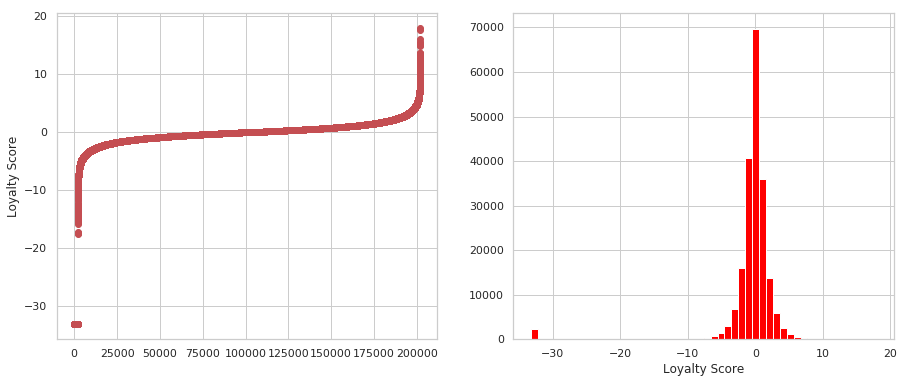

In [54]:
target_col = train.target

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,6))

# Left plot
ax1.scatter(x=range(train.shape[0]), y=np.sort(target_col.values), c='r')
ax1.set_ylabel('Loyalty Score')

# Right plot
ax2.hist(target_col, bins=50, color='red')
ax2.set_xlabel('Loyalty Score')

plt.show()

#### Outliers

In [89]:
outliers = train[target < -20]
print("Number of outliers {}".format(outliers.target.count()))
print("Percentage of the total number of data points {:}%".format((outliers.target.count()/len(train.target))*100))

Number of outliers 2207
Percentage of the total number of data points 1.0930233709890698%


#### Feature Analysis

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


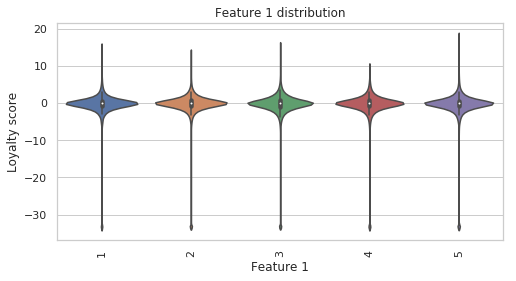

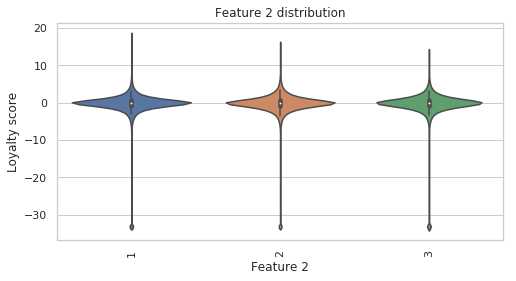

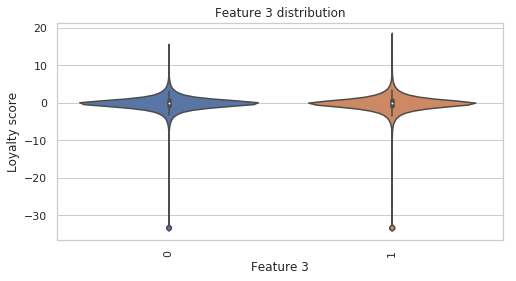

In [95]:
# feature 1
plt.figure(figsize=(8,4))
sns.violinplot(x="feature_1", y=target, data=train)
plt.xticks(rotation='vertical')
plt.xlabel('Feature 1', fontsize=12)
plt.ylabel('Loyalty score', fontsize=12)
plt.title("Feature 1 distribution")
plt.show()

# feature 2
plt.figure(figsize=(8,4))
sns.violinplot(x="feature_2", y=target, data=train)
plt.xticks(rotation='vertical')
plt.xlabel('Feature 2', fontsize=12)
plt.ylabel('Loyalty score', fontsize=12)
plt.title("Feature 2 distribution")
plt.show()

# feature 3
plt.figure(figsize=(8,4))
sns.violinplot(x="feature_3", y=target, data=train)
plt.xticks(rotation='vertical')
plt.xlabel('Feature 3', fontsize=12)
plt.ylabel('Loyalty score', fontsize=12)
plt.title("Feature 3 distribution")
plt.show()

### Dataframe Joining